In [1]:
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import GaussianMixtureModel

In [2]:
# Load data from S3
lines = sc.textFile(
    name="s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv",
    minPartitions=24,
)
parts = lines.map(lambda l: l.split(","))
sources = parts.map(lambda p: (float(p[1]), float(p[2]), float(p[3]), float(p[4])))

In [3]:
gmm = GaussianMixtureModel.load(sc, "gmm.model.2.large")

In [4]:
color_codes = ["c", "y", "r", "g", "k", "m", "b"]
names_and_ansi_codes = {
    "b": [34, "blue"],
    "g": [32, "green"],
    "r": [31, "red"],
    "c": [36, "cyan"],
    "m": [35, "magenta"],
    "y": [33, "yellow"],
    "k": [30, "black"],
}

def print_class_params(_class):
    print("weight: {:.3f}".format(gmm.weights[_class]))
    print("mean: [{:.3f} {:.3f} {:.3f} {:.3f}]".format(*gmm.gaussians[_class].mu))
    cov = gmm.gaussians[_class].sigma.values
    print("covariance matrix: [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[i*4] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+1] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+2] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+3] for i in range(4)]
    ))
    print("color: \x1b[{}m{}\x1b[0m".format(*names_and_ansi_codes[color_codes[_class]]))

### Class 0

In [5]:
print_class_params(_class=0)

weight: 0.156
mean: [0.819 1.673 3.541 0.235]
covariance matrix: [ 0.055  0.050  0.001 -0.010]
                   [ 0.050  0.145 -0.021 -0.050]
                   [ 0.001 -0.021  0.234 -0.004]
                   [-0.010 -0.050 -0.004  0.207]
color: cyan


### Class 1

In [6]:
print_class_params(_class=1)

weight: 0.194
mean: [0.882 1.686 2.235 -0.073]
covariance matrix: [ 0.074  0.073 -0.028 -0.001]
                   [ 0.073  0.092 -0.037  0.000]
                   [-0.028 -0.037  0.560 -0.014]
                   [-0.001  0.000 -0.014  0.013]
color: yellow


### Class 2

In [7]:
print_class_params(_class=2)

weight: 0.218
mean: [1.825 2.576 3.153 -0.010]
covariance matrix: [ 0.394  0.257 -0.001  0.026]
                   [ 0.257  0.241 -0.049  0.014]
                   [-0.001 -0.049  0.396 -0.045]
                   [ 0.026  0.014 -0.045  0.072]
color: red


### Class 3

In [8]:
print_class_params(_class=3)

weight: 0.154
mean: [1.569 2.616 3.634 0.391]
covariance matrix: [ 0.325  0.118 -0.003 -0.030]
                   [ 0.118  0.314 -0.046 -0.123]
                   [-0.003 -0.046  0.238 -0.026]
                   [-0.030 -0.123 -0.026  0.194]
color: green


### Class 4

In [9]:
print_class_params(_class=4)

weight: 0.155
mean: [2.249 2.736 1.990 0.021]
covariance matrix: [ 0.248  0.184  0.017  0.039]
                   [ 0.184  0.154  0.001  0.029]
                   [ 0.017  0.001  0.813 -0.010]
                   [ 0.039  0.029 -0.010  0.016]
color: black


### Class 5

In [10]:
print_class_params(_class=5)

weight: 0.023
mean: [1.183 4.577 2.223 0.221]
covariance matrix: [ 5.398 -0.603  0.358 -0.120]
                   [-0.603  5.078 -1.698 -0.136]
                   [ 0.358 -1.698  3.573 -0.204]
                   [-0.120 -0.136 -0.204  0.592]
color: magenta


### Class 6

In [11]:
print_class_params(_class=6)

weight: 0.100
mean: [1.864 3.392 2.092 -0.002]
covariance matrix: [ 0.876  0.567  0.057  0.014]
                   [ 0.567  0.843  0.123  0.008]
                   [ 0.057  0.123  1.526  0.012]
                   [ 0.014  0.008  0.012  0.017]
color: blue


In [12]:
sampled_sources = sources.sample(withReplacement=False, fraction=0.375)

classes = gmm.predict(sampled_sources)
colors = classes.map(lambda c: color_codes[c])

x = sampled_sources.map(lambda ss: ss[0])
y = sampled_sources.map(lambda ss: ss[1])
z = sampled_sources.map(lambda ss: ss[2])
w = sampled_sources.map(lambda ss: ss[3])

In [13]:
def plot_2d_scatterplot(x_axis, y_axis):
    figure = plt.figure(figsize=(16,12))
    plt.xlabel(x_axis, fontsize="xx-large")
    plt.ylabel(y_axis, fontsize="xx-large")
    plt.scatter(eval(x_axis).collect(), eval(y_axis).collect(), s=0.125, c=colors.collect())
    plt.show()

### x vs. y

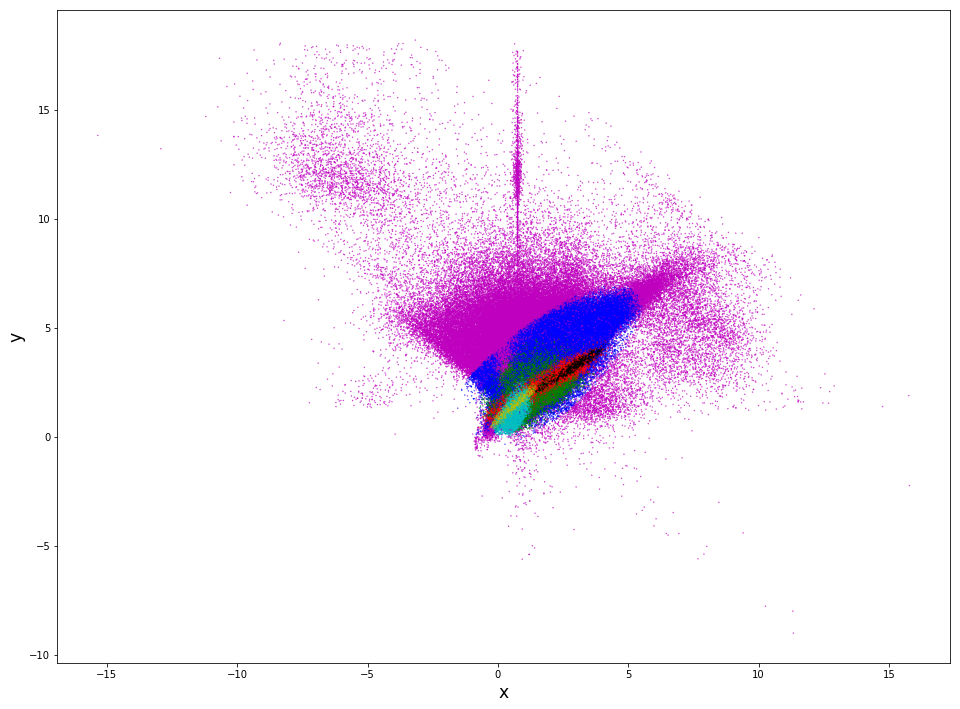

In [14]:
plot_2d_scatterplot(x_axis="x", y_axis="y")

### x vs. z

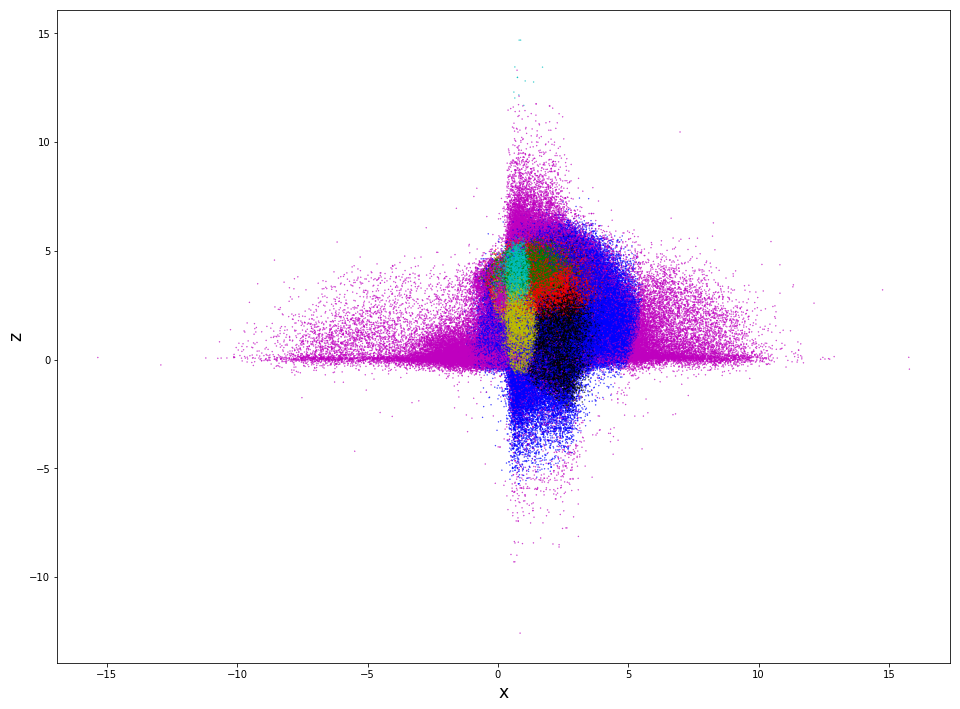

In [15]:
plot_2d_scatterplot(x_axis="x", y_axis="z")

### x vs. w

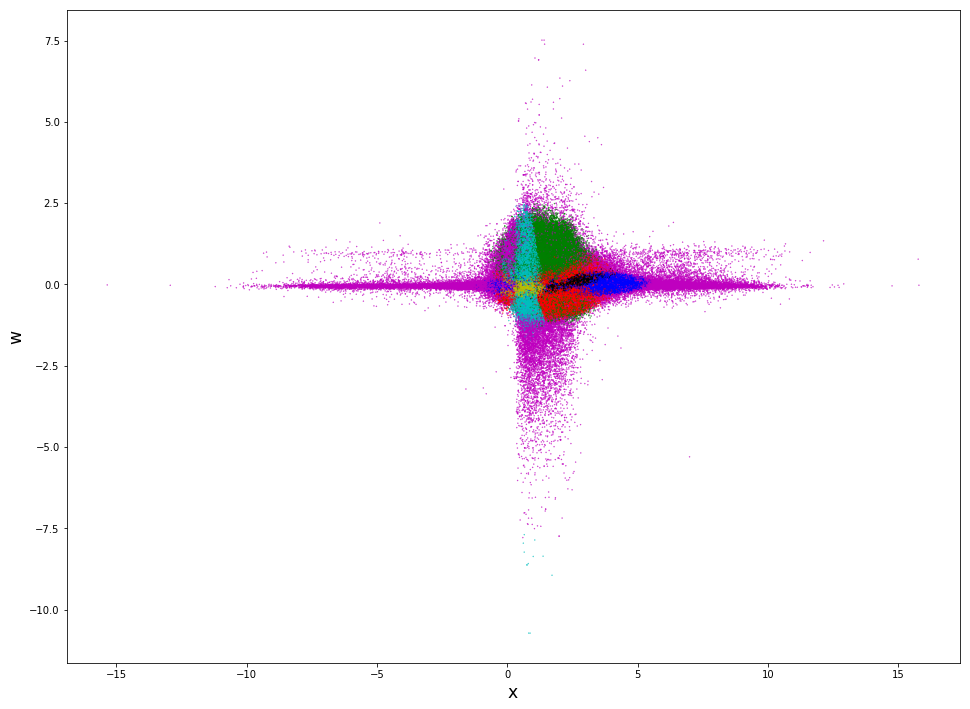

In [16]:
plot_2d_scatterplot(x_axis="x", y_axis="w")

### y vs. z

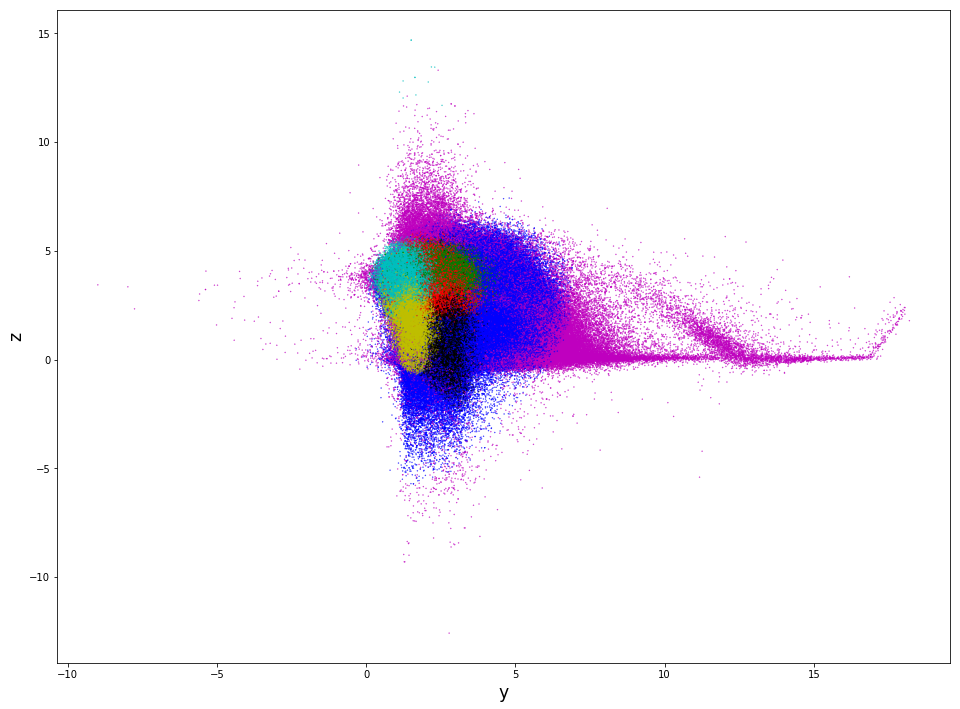

In [17]:
plot_2d_scatterplot(x_axis="y", y_axis="z")

### y vs. w

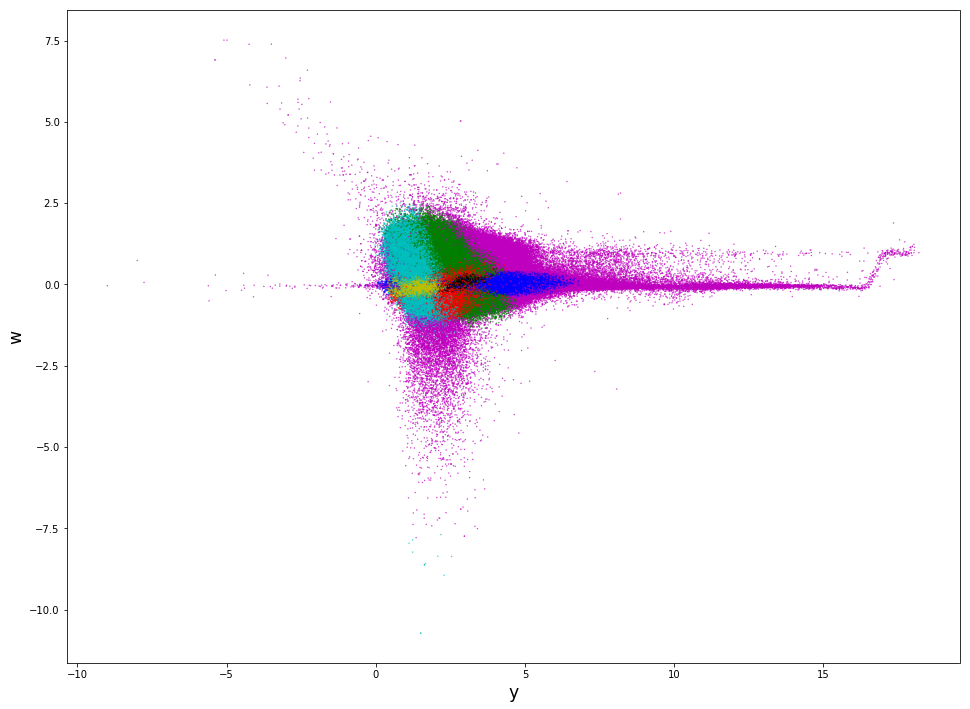

In [18]:
plot_2d_scatterplot(x_axis="y", y_axis="w")

### z vs. w

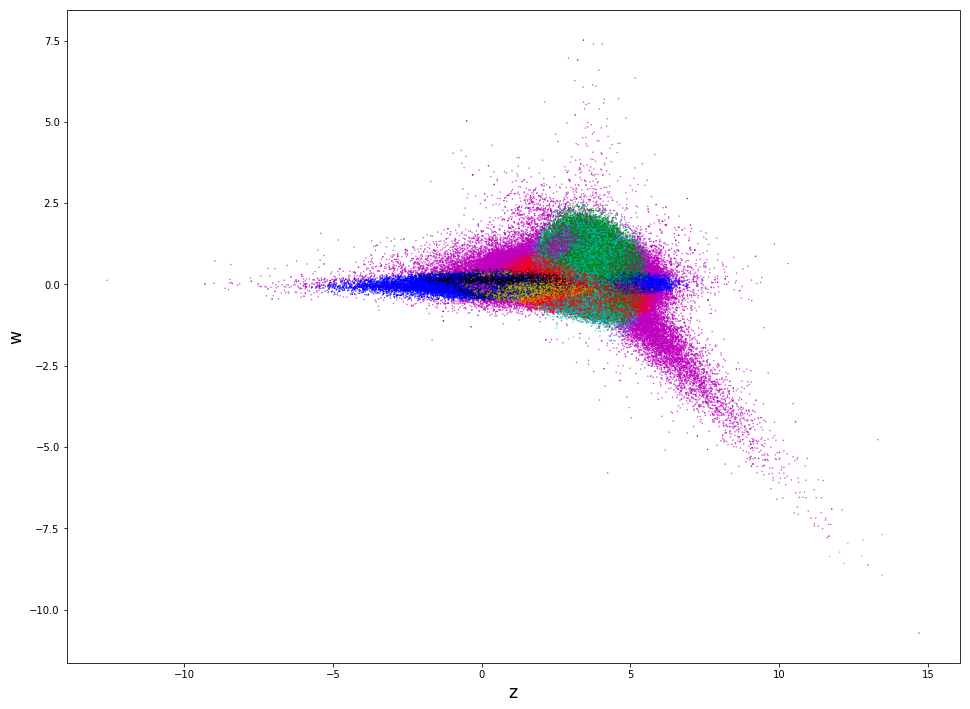

In [19]:
plot_2d_scatterplot(x_axis="z", y_axis="w")